In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
BACTIONS=10
EPISODES=300
RUNS = 10000
EPSILON = .1
ALPHA = .1
GAMMA = 1

In [3]:
def walk(s,a):
    r = 0
    #A
    if s == 2:
        #left
        if a == 0:
            s -= 1
            done = False
            return s,r, done
        #right
        elif a == 1:
            s += 1
            done = True
            return s,r, done
        else:
            raise ValueError('Invalid action provided')
    #B
    elif s == 1:
        s = 0
        done = True
        r = np.random.normal(loc=-0.1,scale=1)
        return s,r, done
    else: 
        raise ValueError('Invalid state provided')

In [4]:
def getActionIndex(sG):
    rand = random.uniform(0,1)
    if rand > EPSILON:
        #do current greedy
        # aIndex = np.argmax(sG)
        aIndex = np.random.choice(np.where(sG == sG.max())[0])
    else: 
        aIndex = random.randint(0,len(sG)-1)
    return aIndex

In [5]:
def QLearning():
    finalPercentages = np.zeros(EPISODES)
    for i in range(RUNS):
        Q = [[0,0],np.zeros(BACTIONS),np.zeros(2),[0,0]]
        leftCount = 0
        percentages = np.zeros(EPISODES)
        for j in range(EPISODES):
            s = 2
            while(True):
                a = getActionIndex(Q[s])
                if s == 2:
                    if a == 0:
                        percentages[j] = 1
                    else: 
                        percentages[j] = 0
                
                sP, r, done = walk(s,a)

                Q[s][a] += ALPHA * (r + (GAMMA * max(Q[sP])) - Q[s][a])

                s = sP

                if (done):
                    break
        finalPercentages = finalPercentages + ((percentages - finalPercentages)/(i+1))
        # print(finalPercentages[0])

    return finalPercentages

In [6]:
def doubleQLearning():
    finalPercentages = np.zeros(EPISODES)
    for i in range(RUNS):
        Q1 = [[0,0],np.zeros(BACTIONS),np.zeros(2),[0,0]]
        Q2 = [[0,0],np.zeros(BACTIONS),np.zeros(2),[0,0]]
        leftCount = 0
        percentages = np.zeros(EPISODES)
        for j in range(EPISODES):
            s = 2
            while(True):
                a = getActionIndex(Q1[s]+Q2[s])
                if s == 2:
                    if a == 0:
                        percentages[j] = 1
                    else: 
                        percentages[j] = 0
                
                sP, r, done = walk(s,a)

                rand = random.uniform(0,1)
                if rand > .5:
                    Q1[s][a] += ALPHA * (r + (GAMMA * Q2[sP][np.argmax(Q1[sP])] ) - Q1[s][a])
                else:
                    Q2[s][a] += ALPHA * (r + (GAMMA * Q1[sP][np.argmax(Q2[sP])] ) - Q2[s][a])

                s = sP
                

                if (done):
                    break
        finalPercentages = finalPercentages + ((percentages - finalPercentages)/(i+1))
        # print(finalPercentages[0])

    return finalPercentages

In [7]:
QLearningResults = QLearning()

In [8]:
doubleQLearningResults = doubleQLearning()

In [9]:
def straightLine():
    return np.full(EPISODES,.05)

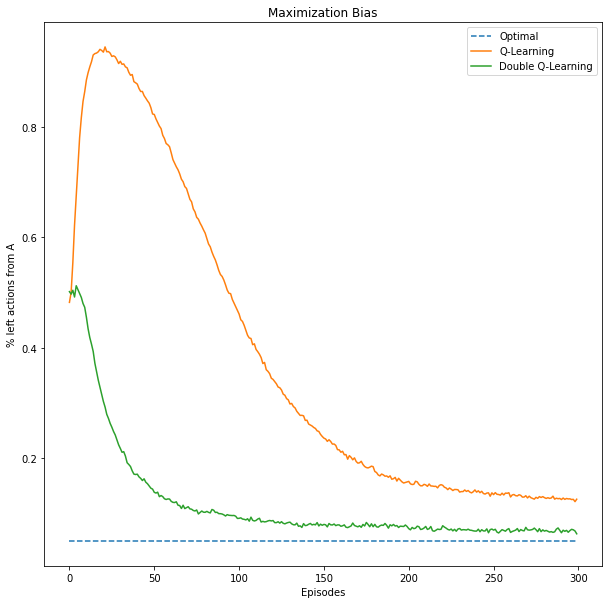

In [12]:
plt.figure(figsize=(10,10))
plt.ylabel("% left actions from A")
plt.xlabel("Episodes")
plt.title("Maximization Bias")
plt.plot(straightLine(),'--',label="Optimal")
plt.plot(QLearningResults,label="Q-Learning")
plt.plot(doubleQLearningResults,label="Double Q-Learning")
plt.legend()
plt.savefig("../figures/example6-7/MaximizationBiasPercentLeft")